# Kernel lineal

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as opt
from scipy.io import loadmat
from sklearn import preprocessing
from sklearn.svm import SVC 

In [8]:
svc = SVC(C=1.0 , kernel='rbf', tol=0.001, max_iter=-1)

In [12]:
data = loadmat('.\p6\ex6data1.mat')
X, y = data['X'], data['y']

In [18]:
svm =  SVC(kernel='linear', C=1.0)
svm.fit(X,y.ravel())

SVC(kernel='linear')

In [20]:
X

array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  , 2.0577  ],
       [2.0103  , 2.3546  ],
       [1.2269  , 2.3239  ],
       [1.8951  , 2.9174  ],
       [1.561   , 3.0709  ],
       [1.5495

In [21]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

<Figure size 432x288 with 0 Axes>

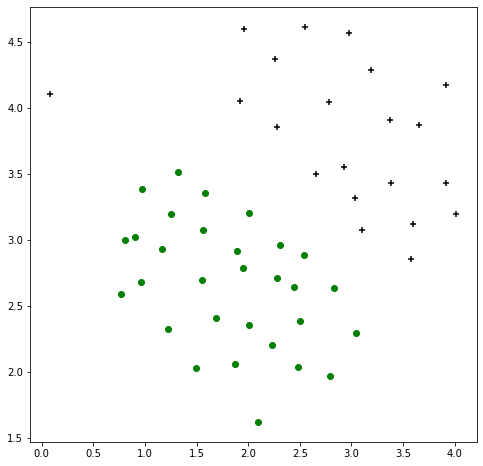

In [28]:
pos_si = np.where(y.ravel()[:]==1)
pos_no = np.where(y.ravel()[:]==0)
plt.figure()
fig= plt.figure(figsize=(8,8))
plt.scatter(X[pos_si,0], X[pos_si,1], marker='+',c = 'k')
plt.scatter(X[pos_no,0], X[pos_no,1], marker='o',c = 'g')
plt.savefig('p6Fig1.png')

In [29]:
def sigmoide(z):
    """
    Devuelve la función sigmoide dado un valor
    Parámetros:
    z    -- numero, array o matriz
    """
    return 1/(1+(math.e**(-z)))

In [53]:
def pinta_frontera_recta(XX,Y):
    plt.figure()
    pos_si = np.where(Y==1)
    pos_no = np.where(Y==0)
    fig= plt.figure(figsize=(8,8))
    plt.scatter(XX[pos_si,0], XX[pos_si,1], marker='+',c = 'k')
    plt.scatter(XX[pos_no,0], XX[pos_no,1], marker='o',c = 'g')
    x1_min, x1_max = XX[:,0].min(), XX[:,0].max()
    x2_min, x2_max = XX[:,1].min(), XX[:,1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),np.linspace(x2_min, x2_max))
    #h = sigmoide(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(theta))
    h = svm.predict(XX).reshape(xx1.shape)
    plt.contour(xx1, xx2, svm, [0.5], linewidths=1, colors='b')
    #plt.savefig("frontera.png")  

In [386]:
def visualize_boundary(X, y, svm, file_name): 
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100) 
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100) 
    x1, x2 = np.meshgrid(x1, x2) 
    yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape) 
    pos = (y == 1).ravel() 
    neg = (y == 0).ravel() 
    plt.figure() 
    plt.figure(figsize=(10,10))
    plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+') 
    plt.scatter( 
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o') 
    plt.contour(x1, x2, yp) 
    plt.savefig(file_name) 
    plt.close()

In [70]:
visualize_boundary(X,y,svm, "p6Fig2.png")

<Figure size 432x288 with 0 Axes>

In [71]:
svm100 =  SVC(kernel='linear', C=100.0)
svm100.fit(X,y.ravel())

SVC(C=100.0, kernel='linear')

In [72]:
visualize_boundary(X,y,svm100, "p6Fig3.png")

<Figure size 432x288 with 0 Axes>

# Kernel gaussiano

In [387]:
data = loadmat('.\p6\ex6data2.mat')
X, y = data['X'], data['y']

In [374]:
X.shape[1]

2

<Figure size 432x288 with 0 Axes>

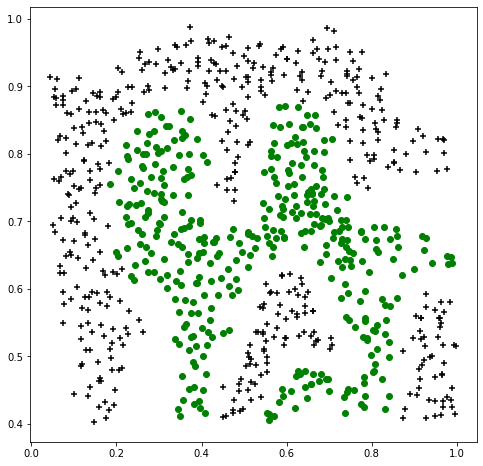

In [74]:
pos_si = np.where(y.ravel()[:]==1)
pos_no = np.where(y.ravel()[:]==0)
plt.figure()
fig= plt.figure(figsize=(8,8))
plt.scatter(X[pos_si,0], X[pos_si,1], marker='+',c = 'k')
plt.scatter(X[pos_no,0], X[pos_no,1], marker='o',c = 'g')
plt.savefig('p6Fig14.png')

In [388]:
C = 1.0
sigma = 0.1
svm =  SVC(kernel='rbf', C=C, gamma = 1 / (2* sigma**2))
svm.fit(X,y.ravel())
visualize_boundary(X,y,svm, "p6Fig5.png")

<Figure size 432x288 with 0 Axes>

## Elección de los parámetros C y ${\sigma}$

$this_{is}^{inline}$

${\lambda}$ ${\sigma}$

In [91]:
data = loadmat('.\p6\ex6data3.mat')
X, y, Xval, yval = data['X'], data['y'], data['Xval'], data['yval']

In [92]:
C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
scores = np.zeros((len(C_vec), len(sigma_vec)))

In [138]:
def genera_modelos(vector_C, vector_Sigma):
    modelos = []
    #para cada valor de C
    for i in vector_C:
        #para cada valor de sigma
        for j in vector_Sigma:
            #añadimos el modelo al conjunto de modelos
            modelos.append(SVC(kernel='rbf', C=i, gamma = 1 / (2 * j**2)))
    return np.array(modelos).reshape(len(vector_C),len(vector_Sigma))

In [ ]:
modelos[0,0]

In [157]:
def evalua_modelos(modelos, X, y, resultados):
    for i in range(modelos.shape[0]):
        for j in range(modelos.shape[1]):
            fname = "p6FigGauss"+str(i+j)+".png"
            modelos[i,j].fit(X,y.ravel())
            visualize_boundary(X,y,modelos[i,j],fname)
            error = np.count_nonzero(np.where((y.ravel() - modelos[i,j].predict(X)) != 0))
            resultados[i,j] = error
    return resultados

In [139]:
modelos = genera_modelos(C_vec,sigma_vec)

In [145]:
modelos

array([[SVC(C=0.01, gamma=5000.0), SVC(C=0.01, gamma=555.5555555555555),
        SVC(C=0.01, gamma=49.99999999999999),
        SVC(C=0.01, gamma=5.555555555555555), SVC(C=0.01, gamma=0.5),
        SVC(C=0.01, gamma=0.05555555555555555), SVC(C=0.01, gamma=0.005),
        SVC(C=0.01, gamma=0.0005555555555555556)],
       [SVC(C=0.03, gamma=5000.0), SVC(C=0.03, gamma=555.5555555555555),
        SVC(C=0.03, gamma=49.99999999999999),
        SVC(C=0.03, gamma=5.555555555555555), SVC(C=0.03, gamma=0.5),
        SVC(C=0.03, gamma=0.05555555555555555), SVC(C=0.03, gamma=0.005),
        SVC(C=0.03, gamma=0.0005555555555555556)],
       [SVC(C=0.1, gamma=5000.0), SVC(C=0.1, gamma=555.5555555555555),
        SVC(C=0.1, gamma=49.99999999999999),
        SVC(C=0.1, gamma=5.555555555555555), SVC(C=0.1, gamma=0.5),
        SVC(C=0.1, gamma=0.05555555555555555), SVC(C=0.1, gamma=0.005),
        SVC(C=0.1, gamma=0.0005555555555555556)],
       [SVC(C=0.3, gamma=5000.0), SVC(C=0.3, gamma=555.55555555555

In [146]:
scores

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [158]:
evalua_modelos(modelos, Xval, yval, scores)

<ipython-input-69-add3dac207f5>:13: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, yp)
<ipython-input-69-add3dac207f5>:13: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, yp)
<ipython-input-69-add3dac207f5>:13: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, yp)
<ipython-input-69-add3dac207f5>:13: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, yp)
<ipython-input-69-add3dac207f5>:13: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, yp)
<ipython-input-69-add3dac207f5>:13: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, yp)
<ipython-input-69-add3dac207f5>:13: UserWarning: No contour levels were found within the data range.
  plt.contour(x1, x2, yp)
<ipython-input-69-add3dac207f5>:13: UserWarning: No contour levels were found within the data range.
  plt.cont

array([[87., 87., 87., 87., 87., 87., 87., 87.],
       [87., 87., 87., 26., 87., 87., 87., 87.],
       [87., 87., 22., 16., 27., 87., 87., 87.],
       [87., 69.,  8., 11., 18., 57., 87., 87.],
       [ 0.,  3.,  9.,  9., 14., 24., 87., 87.],
       [ 0.,  3., 10., 11., 12., 15., 66., 87.],
       [ 0.,  0.,  5., 11., 10., 13., 24., 87.],
       [ 0.,  0.,  4.,  8., 10., 13., 16., 56.]])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [159]:
scores

array([[87., 87., 87., 87., 87., 87., 87., 87.],
       [87., 87., 87., 26., 87., 87., 87., 87.],
       [87., 87., 22., 16., 27., 87., 87., 87.],
       [87., 69.,  8., 11., 18., 57., 87., 87.],
       [ 0.,  3.,  9.,  9., 14., 24., 87., 87.],
       [ 0.,  3., 10., 11., 12., 15., 66., 87.],
       [ 0.,  0.,  5., 11., 10., 13., 24., 87.],
       [ 0.,  0.,  4.,  8., 10., 13., 16., 56.]])

# Detección de spam

In [207]:
dir_spam = '.\p6\spam'
dir_nospam = '.\p6\spamnot'

In [192]:
import re
import nltk
import nltk.stem.porter
import codecs

def preProcess(email):
    
    hdrstart = email.find("\n\n")
    if hdrstart != -1:
        email = email[hdrstart:]

    email = email.lower()
    # Strip html tags. replace with a space
    email = re.sub('<[^<>]+>', ' ', email)
    # Any numbers get replaced with the string 'number'
    email = re.sub('[0-9]+', 'number', email)
    # Anything starting with http or https:// replaced with 'httpaddr'
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email)
    # Strings with "@" in the middle are considered emails --> 'emailaddr'
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)
    # The '$' sign gets replaced with 'dollar'
    email = re.sub('[$]+', 'dollar', email)
    return email


def email2TokenList(raw_email):
    """
    Function that takes in a raw email, preprocesses it, tokenizes it,
    stems each word, and returns a list of tokens in the e-mail
    """

    stemmer = nltk.stem.porter.PorterStemmer()
    email = preProcess(raw_email)

    # Split the e-mail into individual words (tokens) 
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]',
                      email)

    # Loop over each token and use a stemmer to shorten it
    tokenlist = []
    for token in tokens:

        token = re.sub('[^a-zA-Z0-9]', '', token)
        stemmed = stemmer.stem(token)
        #Throw out empty tokens
        if not len(token):
            continue
        # Store a list of all unique stemmed words
        tokenlist.append(stemmed)

    return tokenlist

### Conjuntos entrenamiento

In [309]:
def genera_spam_entrenamiento(): 
    spamt = []
    for i in range(10,90):
        filen = '00'+str(i)+'.txt'
        email_contents = codecs.open(dir_spam+'/'+filen,'r',encoding='utf-8',errors='ignore').read()
        email = email2TokenList(email_contents)
        spamt.append(email)
    return np.array(spamt, dtype = 'object')

In [310]:
def genera_nospam_entrenamiento_facil():
    nospamt = []
    for i in range(10,90):
        dir = dir_nospam +'\easy_ham'
        filen = '00'+str(i)+'.txt'
        email_contents = codecs.open(dir+'/'+filen,'r',encoding='utf-8',errors='ignore').read()
        email = email2TokenList(email_contents)
        nospamt.append(email)
    return np.array(nospamt, dtype = 'object')

In [311]:
def genera_nospam_entrenamiento_tricky():
    nospamt = []
    for i in range(10,90):
        dir = dir_nospam +'\hard_ham'
        filen = '00'+str(i)+'.txt'
        email_contents = codecs.open(dir+'/'+filen,'r',encoding='utf-8',errors='ignore').read()
        email = email2TokenList(email_contents)
        nospamt.append(email)
    return np.array(nospamt, dtype = 'object')

In [301]:
spam_train_words = genera_spam_entrenamiento()
nospam_train_facil_words = genera_nospam_entrenamiento_facil()
nospam_train_tricky_words = genera_nospam_entrenamiento_tricky()

In [228]:
def getVocabDict(reverse=False):
    """
    Function to read in the supplied vocab list text file into a dictionary.
    Dictionary key is the stemmed word, value is the index in the text file
    If "reverse", the keys and values are switched.
    """
    vocab_dict = {}
    with open(".\p6/vocab.txt") as f:
        for line in f:
            (val, key) = line.split()
            if not reverse:
                vocab_dict[key] = int(val)
            else:
                vocab_dict[int(val)] = key

    return vocab_dict

----------------

In [229]:
dict = getVocabDict()

--------------

In [294]:
def vector_binario(lista_bolsas, diccionario):
    claves = list(diccionario.keys())
    lista = []
    for i in range(len(lista_bolsas)):
        #si lo hacemos al reves se pueden incluir palabras no existentes por el uso de 'in'
        lista.append([1 if ele in lista_bolsas[i] else 0 for ele in claves])
    return np.array(lista)

In [297]:
spam_train = vector_binario(spam_train_words, dict)
easy_nospam_train = vector_binario(nospam_train_facil_words, dict)
tricky_nospam_train = vector_binario(nospam_train_tricky_words, dict)

#### Ajuste SVM 

In [390]:
def visualize_boundary(X, y, svm, file_name): 
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100) 
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100) 
    x1, x2 = np.meshgrid(x1, x2) 
    yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape) 
    pos = (y == 1).ravel() 
    neg = (y == 0).ravel() 
    plt.figure() 
    plt.figure(figsize=(10,10))
    plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+') 
    plt.scatter( 
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o') 
    plt.contour(x1, x2, yp) 
    plt.savefig(file_name) 
    plt.close()

In [ ]:
def visualize_boundary(X, y, svm, file_name): 
    Xs = []
    for i in range(X.shape(1)):
        Xs.append(np.linspace(X[:, i].min(), X[:, i].max(), 100))
    x1, x2 = np.meshgrid(x1, x2) 
    yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape) 
    pos = (y == 1).ravel() 
    neg = (y == 0).ravel() 
    plt.figure() 
    plt.figure(figsize=(10,10))
    plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+') 
    plt.scatter( 
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o') 
    plt.contour(x1, x2, yp) 
    plt.savefig(file_name) 
    plt.close()

In [379]:
X = np.concatenate([spam_train,easy_nospam_train])

In [319]:
class_spam = np.ones(len(spam_train))

In [320]:
class_nospam = np.zeros(len(easy_nospam_train))

In [380]:
y = np.concatenate([class_spam,class_nospam])

In [385]:
svm =  SVC(kernel='linear', C=1.0)
svm.fit(X,y.ravel())
visualize_boundary(X,y,svm, "p6FigA.png")

(100, 100)
(100, 100)
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


ValueError: X.shape[1] = 2 should be equal to 1899, the number of features at training time

In [356]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

### Conjuntos validación

In [306]:
def genera_spam_val(): 
    spamt = []
    for i in range(100,200):
        filen = '0'+str(i)+'.txt'
        email_contents = codecs.open(dir_spam+'/'+filen,'r',encoding='utf-8',errors='ignore').read()
        email = email2TokenList(email_contents)
        spamt.append(email)
    return np.array(spamt, dtype = 'object')

In [307]:
def genera_nospam_val_facil():
    nospamt = []
    for i in range(100,200):
        dir = dir_nospam +'\easy_ham'
        filen = '0'+str(i)+'.txt'
        email_contents = codecs.open(dir+'/'+filen,'r',encoding='utf-8',errors='ignore').read()
        email = email2TokenList(email_contents)
        nospamt.append(email)
    return np.array(nospamt, dtype = 'object')

In [312]:
def genera_nospam_val_tricky():
    nospamt = []
    for i in range(100,200):
        dir = dir_nospam +'\hard_ham'
        filen = '0'+str(i)+'.txt'
        email_contents = codecs.open(dir+'/'+filen,'r',encoding='utf-8',errors='ignore').read()
        email = email2TokenList(email_contents)
        nospamt.append(email)
    return np.array(nospamt, dtype = 'object')

In [313]:
spam_val_words = genera_spam_entrenamiento()
nospam_val_facil_words = genera_nospam_entrenamiento_facil()
nospam_val_tricky_words = genera_nospam_entrenamiento_tricky()